In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data.csv')

print(f"Total reviews: {len(df)}")
print(f"Columns: {list(df.columns)}")

Total reviews: 8518
Columns: ['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes', 'Down Votes', 'Month', 'Review text', 'Ratings']


In [5]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [6]:
# cHECKING MISSING DATA
print(df.isnull().sum())

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64


Rating counts:
Ratings
1     769
2     308
3     615
4    1746
5    5080
Name: count, dtype: int64


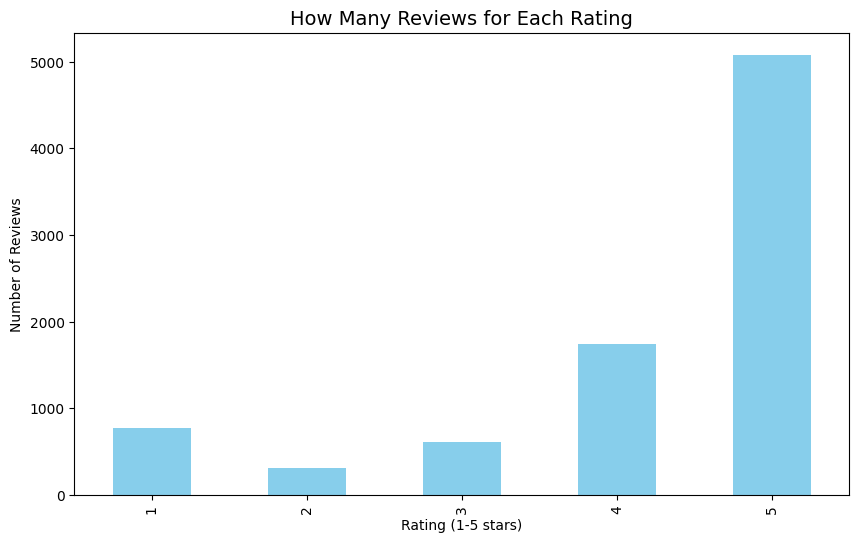

In [10]:
# See Rating Distribution

print("Rating counts:")
print(df['Ratings'].value_counts().sort_index())

plt.figure(figsize=(10,6))
df['Ratings'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('How Many Reviews for Each Rating', fontsize=14)
plt.xlabel('Rating (1-5 stars)')
plt.ylabel('Number of Reviews')
plt.show()

Sentiment counts:
Sentiment
Positive    6826
Negative    1077
Neutral      615
Name: count, dtype: int64


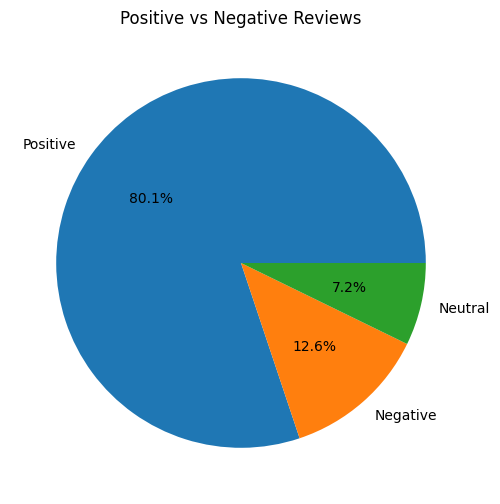

In [12]:
def label_sentiment(rating):
    if pd.isna(rating):
        return None
    elif rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Ratings'].apply(label_sentiment)

print("Sentiment counts:")
print(df['Sentiment'].value_counts())

plt.figure(figsize=(8,6))
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Positive vs Negative Reviews')
plt.ylabel('')
plt.show()

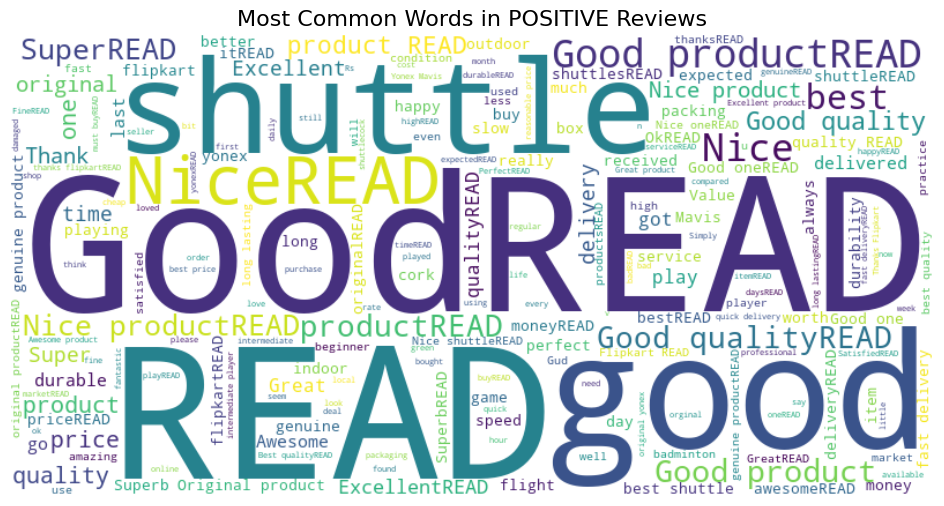

In [13]:
# Word Cloud Visualization
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Review text'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in POSITIVE Reviews', fontsize=16)
plt.show()

In [14]:
#Save Cleaned Data

df_clean = df[df['Sentiment'].isin(['Positive', 'Negative'])].copy()
df_clean = df_clean.dropna(subset=['Review text'])

print(f"Cleaned data: {len(df_clean)} reviews")
print(f"Positive: {len(df_clean[df_clean['Sentiment']=='Positive'])}")
print(f"Negative: {len(df_clean[df_clean['Sentiment']=='Negative'])}")

df_clean.to_csv('cleaned_data.csv', index=False)


Cleaned data: 7895 reviews
Positive: 6823
Negative: 1072
